## Linear Regression Analysis 

### This script will include the following 

1. Importing Libraries & Data
2. Plotting regression analysis and comparing predicted values with actual values


### 1. Importing Libraries & Data

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

path = r'/Users/aahamoustafa/Desktop/Data Projects/CitiBike'

trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_new.csv') ,index_col = False)
stations = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike-stations.csv'))


In [29]:
pd.set_option('display.max_columns', None)
trips.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,usertype_encoded,gender_encoded,age,start_hour,stop_hour,start_day,stop_day,month,year,weekday,trip_distance,weekday_encoded,Age_Distribution,tripduration_minutes,startdate,stopdate
0,2319,2016-03-09 13:08:21,2016-03-09 13:47:01,520,W 52 St & 5 Ave,40.759923,-73.976485,363,West Thames St,40.708347,-74.017134,23062,Subscriber,male,1,1,44.0,13,13,9,9,3,2016,Wednesday,6.677860,2,Adults,39.0,2016-03-09,2016-03-09
1,313,2015-07-09 15:42:30,2015-07-09 15:47:44,520,W 52 St & 5 Ave,40.759923,-73.976485,493,W 45 St & 6 Ave,40.756800,-73.982912,16909,Subscriber,female,1,0,47.0,15,15,9,9,7,2015,Thursday,0.643981,3,Adults,5.0,2015-07-09,2015-07-09
2,798,2017-04-20 18:43:59,2017-04-20 18:57:17,520,W 52 St & 5 Ave,40.759923,-73.976485,3258,W 27 St & 10 Ave,40.750182,-74.002184,15555,Subscriber,male,1,1,26.0,18,18,20,20,4,2017,Thursday,2.424841,3,Youths,13.0,2017-04-20,2017-04-20
3,3100,2017-04-23 15:23:46,2017-04-23 16:15:26,520,W 52 St & 5 Ave,40.759923,-73.976485,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,20648,Customer,unknown,0,2,NaN,15,16,23,23,4,2017,Sunday,0.549202,6,NaN,52.0,2017-04-23,2017-04-23
4,906,2016-01-11 18:32:33,2016-01-11 18:47:39,520,W 52 St & 5 Ave,40.759923,-73.976485,3162,W 78 St & Broadway,40.783400,-73.980931,15614,Subscriber,male,1,1,55.0,18,18,11,11,1,2016,Monday,2.634014,0,Adults,15.0,2016-01-11,2016-01-11


### 2. Plotting regression analysis and comparing predicted values with actual values

#### Creating a Scatterplot

In [126]:
trips.dropna(inplace = True)

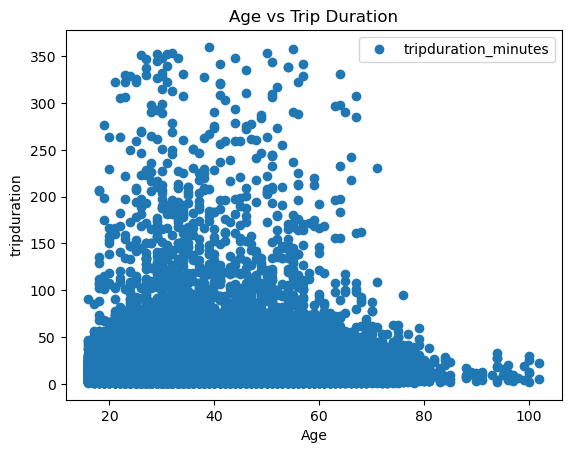

In [128]:
# Create a scatterplot using matplotlib for a look at how the chosen variables plot against each other.

trips.plot(x = 'age', y='tripduration_minutes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Trip Duration')  
plt.xlabel('Age')  
plt.ylabel('tripduration')  
plt.show()

#### Reshaping the variables into Numpy Arrays

In [130]:
## using the reshape function 
X = trips['age'].values.reshape(-1,1)
y = trips['tripduration_minutes'].values.reshape(-1,1)

#### Splitting training & test data

In [132]:
# Split data into a training set and a test set with a test size of 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [134]:
## creating a regression object
regression = LinearRegression() 

In [136]:
## fitting regression object onto the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [138]:
##Predict the values of y using X.

y_predicted = regression.predict(X_test)

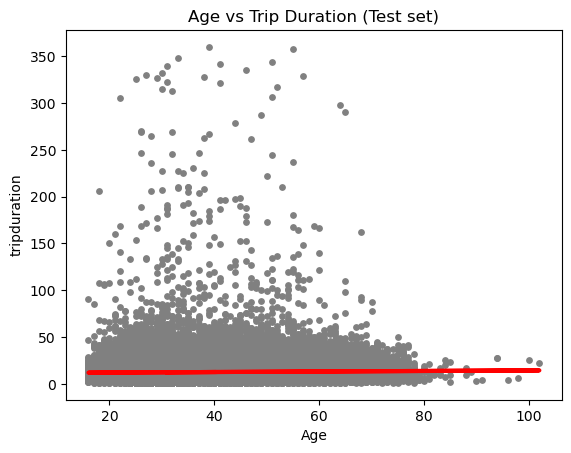

In [140]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Trip Duration (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('tripduration')
plot_test.show()

In [142]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 


# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.02811118]]
Mean squared error:  128.5507516437942
R2 score:  0.000870395670429347


In [144]:

# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)


,Actual,Predicted
0,20.0,12.652407
1,14.0,12.343184
2,10.0,13.017852
3,12.0,12.146405
4,8.0,12.371295
5,8.0,12.596184
6,12.0,12.596184
7,13.0,12.399406
8,11.0,12.315073
9,14.0,12.399406


The regression model is not performing well because the predictor (Age) has almost no effect on the target variable (Trip Duration).